# Gluon RNN Classifier for Human activity recognition

Classify human activity based on smartphone accelerometer and gyroscope data with gluon. A handy extensible RNNClassifier Gluon is provided which makes it simple to use RNN for other problems. 

## Dataset

Human Activity Recognition Using Smartphones Data Set 

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

## Overview

Follow this link to see a video of how the data was collected:

<p align="center">
  <a href="http://www.youtube.com/watch?feature=player_embedded&v=XOEN9W05_4A
" target="_blank"><img src="http://img.youtube.com/vi/XOEN9W05_4A/0.jpg" 
alt="Video of the experiment" width="400" height="300" border="10" /></a>
  <a href="https://youtu.be/XOEN9W05_4A"><center>[Watch video]</center></a>
</p>

In [21]:
# CODE

import numpy as np
from docutils.utils.math.latex2mathml import mx
from mxnet_rnn_util import BaseRNNClassifier

INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
] 

## Data preparation

You can download the dataset and unzip it with its existing folder structure from https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

** To make it easier, its been provided in the data/ folder **

In [22]:
### Load Data
train = ["data/har_data/train/%strain.txt" % signal for signal in INPUT_SIGNAL_TYPES]
test = ["data/har_data/test/%stest.txt" % signal for signal in INPUT_SIGNAL_TYPES]

def load_data(files):
    arr = []
    for fname in files:
        with open(fname, 'r') as f:
            rows = [row.replace('  ', ' ').strip().split(' ') for row in f]
            arr.append([np.array(ele, dtype=np.float32) for ele in rows])
    return np.transpose(np.array(arr), (1, 2, 0))

X_train = load_data(train)
X_test = load_data(test)

X_train.shape

(7352, 128, 9)

### Load training labels

In [23]:
import pandas as pd

y_train_path = "data/har_data/train/y_train.txt"

df = pd.read_csv(y_train_path, names=["labels"])
y_train = np.asarray(list(df.to_dict()['labels'].values())).astype('float32')

y_test_path = "data/har_data/test/y_test.txt"
df = pd.read_csv(y_test_path, names=["labels"])
y_test = np.asarray(list(df.to_dict()['labels'].values())).astype('float32')

y_train.shape, y_test.shape

((7352,), (2947,))

### A Gluon RNN Helper class has been provided here to help extend and reuse the same code for other problems

In [25]:
# RNN Helper class


### Network definition and training

In [26]:
ctx = mx.cpu() # .gpu(0) #change context to execute on CPU
model = BaseRNNClassifier(ctx)
model.build_model(n_out=len(LABELS), rnn_size=64, n_layer=1)
model.compile_model()
train_loss, train_acc, test_acc = model.fit([X_train, y_train], [X_test, y_test], batch_size=32, epochs=25)

Data type: <class 'list'> <class 'list'> numpy <class 'numpy.ndarray'>
Data type: <class 'list'> <class 'list'> numpy
Sizes 1 32 64 cpu(0)
[Epoch 0] [Batch 0/229] Loss: 1.77536, Batch acc: 0.15625
[Epoch 0] [Batch 100/229] Loss: 1.40763, Batch acc: 0.53125
[Epoch 0] [Batch 200/229] Loss: 1.19701, Batch acc: 0.37500
Epoch 0. Loss: 1.10811 Train Acc: ('accuracy', 0.4542849344978166) Test Acc: ('accuracy', 0.42697010869565216)
[Epoch 1] [Batch 0/229] Loss: 0.65015, Batch acc: 0.43750
[Epoch 1] [Batch 100/229] Loss: 0.69905, Batch acc: 0.59375
[Epoch 1] [Batch 200/229] Loss: 0.65364, Batch acc: 0.53125
Epoch 1. Loss: 0.64143 Train Acc: ('accuracy', 0.5739628820960698) Test Acc: ('accuracy', 0.5431385869565217)
[Epoch 2] [Batch 0/229] Loss: 0.50857, Batch acc: 0.46875
[Epoch 2] [Batch 100/229] Loss: 0.50067, Batch acc: 0.46875
[Epoch 2] [Batch 200/229] Loss: 0.43946, Batch acc: 0.68750
Epoch 2. Loss: 0.41712 Train Acc: ('accuracy', 0.6209061135371179) Test Acc: ('accuracy', 0.52377717391304

#### Lets plot accuracy and loss over each epoch

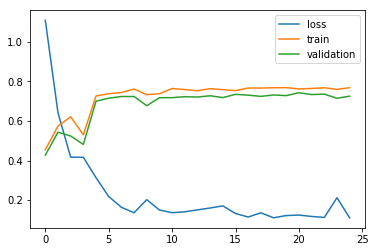

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_loss, label="loss")
plt.plot(train_acc, label="train")
plt.plot(test_acc, label="validation")
plt.legend()
plt.show()

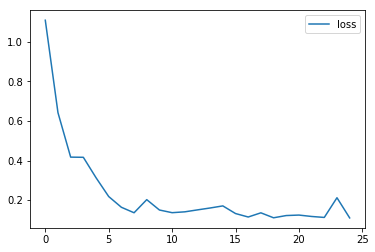

In [29]:
# Loss plot

plt.plot(train_loss, label="loss")
plt.legend()
plt.show()

In [30]:
!mkdir models
model.save_parameters('models/model.params')

## Excercise 

1. Build the confusion matrix 
2. Try plotting the misclassified samples
3. Can we use a CNN to solve this problem? 